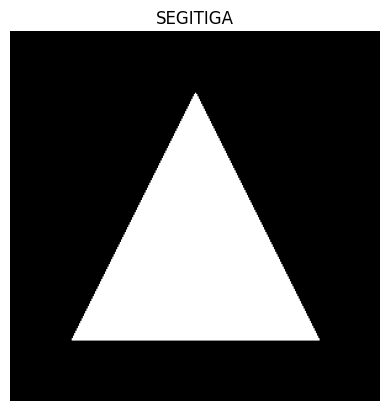

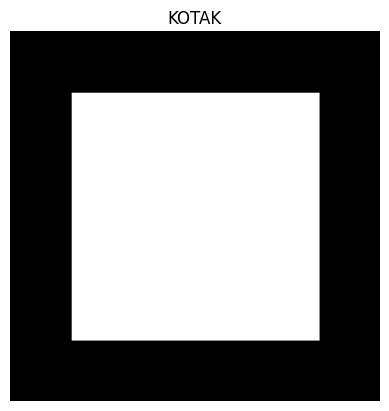

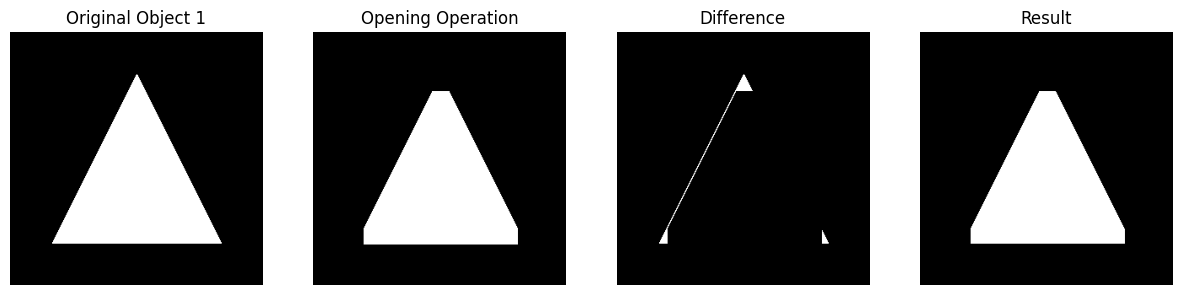

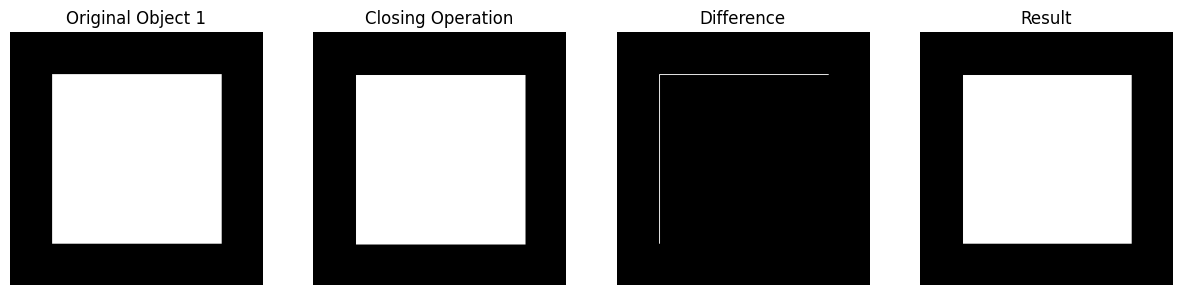

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar
def show_image(image, title="Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Fungsi untuk menampilkan proses perubahan per objek
def show_morph_process_per_object(image, kernel, operation):
    # Membuat salinan citra untuk menghindari modifikasi citra asli
    img_copy = image.copy()

    # Mencari kontur pada citra
    contours, _ = cv2.findContours(img_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Iterasi melalui setiap kontur dan melakukan operasi morfologi
    for idx, contour in enumerate(contours):
        mask = np.zeros_like(img_copy)
        cv2.drawContours(mask, [contour], -1, 255, -1)

        if operation == 'Opening':
            processed = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        elif operation == 'Closing':
            processed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        img_copy = cv2.bitwise_and(img_copy, processed)

        # Menampilkan proses perubahan per objek
        plt.figure(figsize=(15, 4))
        plt.subplot(141)
        plt.imshow(mask, cmap='gray')
        plt.title('Original Object ' + str(idx+1))
        plt.axis('off')
        plt.subplot(142)
        plt.imshow(processed, cmap='gray')
        plt.title(operation + ' Operation')
        plt.axis('off')
        plt.subplot(143)
        plt.imshow(cv2.subtract(mask, processed), cmap='gray')
        plt.title('Difference')
        plt.axis('off')
        plt.subplot(144)
        plt.imshow(img_copy, cmap='gray')
        plt.title('Result')
        plt.axis('off')
        plt.show()

# Membuat citra biner untuk segitiga
triangle_img = np.zeros((300, 300), dtype=np.uint8)
pts = np.array([[150, 50], [50, 250], [250, 250]], np.int32)
cv2.fillPoly(triangle_img, [pts], 255)

# Membuat citra biner untuk kotak
square_img = np.zeros((300, 300), dtype=np.uint8)
cv2.rectangle(square_img, (50, 50), (250, 250), 255, -1)

# Menampilkan citra segitiga dan kotak
show_image(triangle_img, "SEGITIGA")
show_image(square_img, "KOTAK")

# Definisikan elemen struktur untuk operasi morfologi
kernel = np.ones((20,20), np.uint8)

# Menampilkan proses perubahan per objek untuk operasi pembukaan pada citra segitiga
show_morph_process_per_object(triangle_img, kernel, 'Opening')

# Menampilkan proses perubahan per objek untuk operasi penutupan pada citra kotak
show_morph_process_per_object(square_img, kernel, 'Closing')
